In [1]:
import numpy as np
import pandas as pd
pd.set_option('display.max.rows', 1000)
import seaborn as sns
import matplotlib.pyplot as plt
%matplotlib inline 
sns.set(style='ticks')

### Подготовка датасета

In [2]:
# Red Wine Quality
# Simple and clean practice dataset for regression or classification modelling
data = pd.read_csv('data/winequality-red.csv')
data.shape

(1599, 12)

In [3]:
data.isnull().sum()

fixed acidity           0
volatile acidity        0
citric acid             0
residual sugar          0
chlorides               0
free sulfur dioxide     0
total sulfur dioxide    0
density                 0
pH                      0
sulphates               0
alcohol                 0
quality                 0
dtype: int64

In [4]:
data.dtypes

fixed acidity           float64
volatile acidity        float64
citric acid             float64
residual sugar          float64
chlorides               float64
free sulfur dioxide     float64
total sulfur dioxide    float64
density                 float64
pH                      float64
sulphates               float64
alcohol                 float64
quality                   int64
dtype: object

In [5]:
# пропусков нет, разделим на обучающую и тестовую выборку
from sklearn.model_selection import train_test_split

In [6]:
# перед этим разделим исходный датасет на 2: один содержит независимые параметры, другой – зависимый (quality)
X, y = data[data.columns[range(11)]], data[data.columns[[11]]]

In [7]:
X.dtypes

fixed acidity           float64
volatile acidity        float64
citric acid             float64
residual sugar          float64
chlorides               float64
free sulfur dioxide     float64
total sulfur dioxide    float64
density                 float64
pH                      float64
sulphates               float64
alcohol                 float64
dtype: object

In [8]:
y.dtypes

quality    int64
dtype: object

In [9]:
test_size = 0.2
state = 42
xTrain, xTest, yTrain, yTest = train_test_split(X, y, test_size=test_size, random_state=state)
len(xTrain), len(xTest), len(yTrain), len(yTest)

(1279, 320, 1279, 320)

### Обучение модели на произвольном гиперпараметре K

In [10]:
# quality имеет целочисленные значения от 0 до 10 включительно (на самом деле 6). Используем Classifier
from sklearn.neighbors import KNeighborsClassifier
print('Кол-во классов:', len(data['quality'].unique()))

Кол-во классов: 6


In [11]:
# обучим модель для произвольно заданного гиперпараметра K
K_value = 3
KNeighborsClassifierObj = KNeighborsClassifier(n_neighbors=K_value)
KNeighborsClassifierObj.fit(xTrain, yTrain.values.ravel())

KNeighborsClassifier(algorithm='auto', leaf_size=30, metric='minkowski',
           metric_params=None, n_jobs=None, n_neighbors=3, p=2,
           weights='uniform')

In [12]:
yPredictedTest = KNeighborsClassifierObj.predict(xTest)
yPredictedTest

array([6, 5, 6, 5, 6, 5, 5, 5, 6, 6, 8, 5, 6, 6, 6, 7, 6, 5, 7, 5, 4, 5,
       5, 5, 5, 5, 7, 5, 5, 6, 5, 5, 5, 6, 5, 5, 6, 6, 6, 5, 6, 5, 6, 5,
       6, 6, 6, 6, 5, 4, 5, 5, 5, 7, 4, 6, 6, 7, 6, 5, 5, 8, 6, 5, 6, 6,
       7, 5, 5, 5, 5, 5, 6, 5, 6, 5, 5, 5, 5, 5, 5, 7, 5, 5, 6, 5, 5, 6,
       6, 4, 5, 5, 5, 6, 5, 6, 5, 4, 5, 5, 5, 5, 6, 7, 6, 6, 6, 6, 5, 5,
       6, 5, 7, 5, 6, 6, 5, 5, 5, 7, 5, 6, 7, 5, 5, 6, 6, 6, 5, 6, 6, 6,
       5, 7, 4, 5, 6, 6, 4, 6, 5, 5, 7, 6, 6, 5, 6, 7, 5, 5, 6, 6, 5, 5,
       6, 6, 5, 4, 6, 5, 7, 5, 5, 5, 6, 6, 6, 5, 5, 5, 6, 5, 7, 6, 5, 5,
       4, 4, 5, 7, 6, 5, 5, 6, 5, 5, 6, 6, 7, 6, 6, 6, 6, 7, 4, 5, 6, 5,
       3, 6, 5, 5, 5, 6, 7, 6, 5, 5, 4, 5, 7, 5, 6, 7, 6, 5, 5, 6, 5, 5,
       6, 5, 6, 6, 6, 6, 5, 6, 5, 5, 5, 5, 7, 4, 5, 6, 5, 6, 5, 5, 7, 5,
       5, 5, 6, 7, 5, 5, 7, 5, 6, 5, 5, 6, 6, 5, 6, 6, 8, 6, 6, 6, 4, 7,
       6, 6, 5, 5, 6, 6, 6, 4, 6, 6, 5, 5, 6, 7, 5, 6, 5, 6, 5, 5, 5, 6,
       5, 5, 6, 6, 5, 6, 5, 6, 5, 5, 5, 6, 5, 5, 5,

In [13]:
yPredictedTrain = KNeighborsClassifierObj.predict(xTrain)
yPredictedTrain

array([6, 5, 6, ..., 5, 6, 7])

In [14]:
yTest['quality'].values

array([6, 5, 6, 5, 6, 5, 5, 5, 5, 6, 7, 3, 5, 5, 6, 7, 5, 7, 8, 5, 5, 6,
       5, 6, 6, 6, 7, 6, 5, 6, 5, 5, 6, 5, 6, 5, 7, 5, 4, 6, 5, 5, 7, 5,
       5, 6, 7, 6, 5, 6, 5, 5, 5, 7, 6, 6, 6, 5, 5, 5, 5, 7, 5, 6, 6, 5,
       6, 5, 6, 5, 6, 4, 6, 6, 6, 5, 8, 5, 6, 6, 5, 6, 5, 6, 6, 7, 5, 6,
       7, 4, 7, 6, 5, 5, 5, 6, 5, 6, 5, 6, 5, 5, 5, 7, 6, 7, 6, 5, 6, 5,
       8, 5, 6, 5, 6, 7, 6, 6, 5, 6, 6, 6, 6, 6, 6, 6, 7, 6, 5, 5, 6, 5,
       5, 5, 6, 5, 5, 5, 5, 6, 7, 6, 8, 5, 5, 5, 6, 6, 6, 5, 6, 7, 6, 5,
       6, 5, 5, 6, 6, 6, 7, 5, 7, 5, 5, 5, 6, 6, 5, 5, 6, 5, 7, 6, 7, 6,
       6, 5, 5, 6, 4, 6, 5, 7, 5, 5, 4, 5, 7, 6, 5, 6, 6, 7, 6, 5, 5, 6,
       5, 7, 5, 6, 6, 5, 7, 5, 5, 5, 6, 7, 7, 5, 5, 6, 6, 7, 6, 5, 6, 6,
       6, 6, 6, 7, 4, 5, 5, 7, 5, 5, 5, 5, 6, 6, 5, 7, 5, 6, 6, 6, 5, 4,
       6, 7, 6, 7, 5, 6, 6, 5, 5, 6, 5, 6, 4, 5, 6, 6, 5, 6, 6, 5, 5, 6,
       7, 7, 6, 5, 6, 6, 5, 6, 5, 6, 5, 5, 5, 6, 6, 6, 7, 5, 5, 6, 5, 7,
       5, 6, 4, 6, 6, 8, 6, 5, 5, 6, 5, 7, 6, 6, 5,

In [15]:
# оценим качество модели классификации
from sklearn.metrics import accuracy_score, confusion_matrix, precision_score, f1_score

print('Accuracy (train): {} %'.format(accuracy_score(yTrain, yPredictedTrain) * 100))
print('Accuracy (test): {} %'.format(accuracy_score(yTest, yPredictedTest) * 100))

Accuracy (train): 74.12040656763097 %
Accuracy (test): 45.3125 %


In [16]:
print('Матрица ошибок: столбцы – предсказанное значение, строки – истинное значение')
print('Train\n', confusion_matrix(yTrain, yPredictedTrain))
print('Test\n', confusion_matrix(yTest, yPredictedTest))

Матрица ошибок: столбцы – предсказанное значение, строки – истинное значение
Train
 [[  8   0   1   0   0   0]
 [  3  15  16   8   1   0]
 [  0  14 464  70   3   0]
 [  1  12 109 366  17   1]
 [  1   5  27  30  93   1]
 [  0   1   4   4   2   2]]
Test
 [[ 0  0  1  0  0  0]
 [ 0  1  2  7  0  0]
 [ 1  4 81 40  3  1]
 [ 0 11 57 51 13  0]
 [ 0  0 10 18 12  2]
 [ 0  0  1  2  2  0]]


In [17]:
print('Train\n', precision_score(yTrain, yPredictedTrain, average='weighted'))
print('Test\n', precision_score(yTest, yPredictedTest, average='weighted'))

Train
 0.7433691543962138
Test
 0.44922551014719003


In [18]:
print('Train\n', f1_score(yTrain, yPredictedTrain, average='weighted'))
print('Test\n', f1_score(yTest, yPredictedTest, average='weighted'))

Train
 0.7377685441292957
Test
 0.4478315057283142


качество оставляет желать лучшего

### Оценим качество с использованием *кросс-валидации*

In [19]:
from sklearn.model_selection import cross_val_score, cross_validate
# автоматически выбирается стратегия
scores = cross_val_score(KNeighborsClassifierObj, X, y.values.ravel(), cv=3)  # 3 фолда
scores  # accuracy by default

array([0.4635514 , 0.42401501, 0.38229755])

In [20]:
np.mean(scores)

0.4232879876796997

In [21]:
scoring = {'precision': 'precision_weighted', 
           'recall': 'recall_weighted',
           'f1': 'f1_weighted'}
scores = cross_validate(KNeighborsClassifierObj, X, y.values.ravel(), scoring=scoring, cv=3, return_train_score=True)
scores

/Users/artyom.andreev/Study/.venv/lib/python3.7/site-packages/sklearn/metrics/classification.py:1143: UndefinedMetricWarning: Precision is ill-defined and being set to 0.0 in labels with no predicted samples.
  'precision', 'predicted', average, warn_for)
/Users/artyom.andreev/Study/.venv/lib/python3.7/site-packages/sklearn/metrics/classification.py:1143: UndefinedMetricWarning: F-score is ill-defined and being set to 0.0 in labels with no predicted samples.
  'precision', 'predicted', average, warn_for)
/Users/artyom.andreev/Study/.venv/lib/python3.7/site-packages/sklearn/metrics/classification.py:1143: UndefinedMetricWarning: Precision is ill-defined and being set to 0.0 in labels with no predicted samples.
  'precision', 'predicted', average, warn_for)
/Users/artyom.andreev/Study/.venv/lib/python3.7/site-packages/sklearn/metrics/classification.py:1143: UndefinedMetricWarning: F-score is ill-defined and being set to 0.0 in labels with no predicted samples.
  'precision', 'predicted',

{'fit_time': array([0.00234604, 0.00160694, 0.00212288]),
 'score_time': array([0.05179119, 0.04728293, 0.04403687]),
 'test_precision': array([0.45371836, 0.41355857, 0.38212618]),
 'train_precision': array([0.75838617, 0.73362752, 0.76695829]),
 'test_recall': array([0.4635514 , 0.42401501, 0.38229755]),
 'train_recall': array([0.75657895, 0.74202627, 0.76872659]),
 'test_f1': array([0.44416531, 0.41751315, 0.37968412]),
 'train_f1': array([0.75435552, 0.73580897, 0.76481946])}

In [22]:
# Попробуем различные стратегии кросс-валидации

In [23]:
# 1) K-fold
from sklearn.model_selection import KFold
scores = cross_val_score(KNeighborsClassifierObj, X, y.values.ravel(), cv=KFold(n_splits=12))
scores

array([0.57462687, 0.51492537, 0.41791045, 0.47368421, 0.45112782,
       0.56390977, 0.36090226, 0.27819549, 0.38345865, 0.31578947,
       0.36842105, 0.4962406 ])

In [24]:
np.mean(scores)

0.4332660008229529

In [25]:
import warnings
warnings.filterwarnings("ignore")
scoring = {'precision': 'precision_weighted', 
           'recall': 'recall_weighted',
           'f1': 'f1_weighted'}
scores = cross_validate(KNeighborsClassifierObj, X, y.values.ravel(), scoring=scoring, cv=KFold(n_splits=12), return_train_score=True)
scores

{'fit_time': array([0.00311399, 0.00163817, 0.00166607, 0.0016489 , 0.00195003,
        0.00162411, 0.00163603, 0.00163603, 0.00167012, 0.00169396,
        0.00176001, 0.00165486]),
 'score_time': array([0.01807165, 0.01277804, 0.01297998, 0.02003312, 0.01504779,
        0.01295805, 0.01273513, 0.01311803, 0.01537585, 0.01284575,
        0.01283503, 0.01267815]),
 'test_precision': array([0.54795758, 0.45864117, 0.44446117, 0.46288116, 0.46474052,
        0.57842938, 0.36485284, 0.33095317, 0.43917689, 0.30308986,
        0.36386895, 0.51856484]),
 'train_precision': array([0.75888839, 0.74756499, 0.75879577, 0.74220849, 0.74908284,
        0.74108407, 0.76002248, 0.75521553, 0.7492982 , 0.75575271,
        0.75141529, 0.75360119]),
 'test_recall': array([0.57462687, 0.51492537, 0.41791045, 0.47368421, 0.45112782,
        0.56390977, 0.36090226, 0.27819549, 0.38345865, 0.31578947,
        0.36842105, 0.4962406 ]),
 'train_recall': array([0.75972696, 0.74880546, 0.76109215, 0.74829468, 

In [26]:
# 2) ShuffleSplit
from sklearn.model_selection import ShuffleSplit
scores = cross_val_score(KNeighborsClassifierObj, X, y.values.ravel(), cv=ShuffleSplit(n_splits=12, test_size=0.2))
scores

array([0.48125 , 0.484375, 0.496875, 0.50625 , 0.5375  , 0.496875,
       0.475   , 0.5375  , 0.5     , 0.490625, 0.5125  , 0.45625 ])

In [27]:
np.mean(scores)

0.4979166666666666

In [28]:
scoring = {'precision': 'precision_weighted', 
           'recall': 'recall_weighted',
           'f1': 'f1_weighted'}
scores = cross_validate(KNeighborsClassifierObj, X, y.values.ravel(), scoring=scoring, cv=ShuffleSplit(n_splits=12, test_size=0.2), return_train_score=True)
scores

{'fit_time': array([0.00483608, 0.00173998, 0.00169802, 0.00152802, 0.00154281,
        0.00161099, 0.00154805, 0.00161314, 0.00155735, 0.00182295,
        0.00151014, 0.00193   ]),
 'score_time': array([0.03395581, 0.02847791, 0.02867103, 0.02507496, 0.025419  ,
        0.02515411, 0.02548289, 0.02572799, 0.02603269, 0.02527618,
        0.02530003, 0.03058004]),
 'test_precision': array([0.50027396, 0.48993412, 0.53625678, 0.46816591, 0.50789372,
        0.48495138, 0.53453958, 0.49157191, 0.51932948, 0.48270354,
        0.50674642, 0.44517754]),
 'train_precision': array([0.73477805, 0.73502993, 0.74046874, 0.73166586, 0.75345453,
        0.75179927, 0.73666561, 0.74540789, 0.7364081 , 0.72409601,
        0.74274148, 0.74512196]),
 'test_recall': array([0.5     , 0.496875, 0.528125, 0.471875, 0.503125, 0.49375 ,
        0.5375  , 0.503125, 0.525   , 0.503125, 0.496875, 0.459375]),
 'train_recall': array([0.7404222 , 0.73807662, 0.73338546, 0.7365129 , 0.74902267,
        0.74980453, 

In [29]:
# 3) RepeatedKFold
from sklearn.model_selection import RepeatedKFold
scores = cross_val_score(KNeighborsClassifierObj, X, y.values.ravel(), cv=RepeatedKFold(n_splits=12, n_repeats=2))
scores

array([0.53731343, 0.59701493, 0.49253731, 0.44360902, 0.52631579,
       0.48120301, 0.56390977, 0.47368421, 0.5037594 , 0.60902256,
       0.44360902, 0.51879699, 0.53731343, 0.52985075, 0.50746269,
       0.5112782 , 0.53383459, 0.42857143, 0.45864662, 0.52631579,
       0.56390977, 0.4887218 , 0.56390977, 0.53383459])

In [30]:
np.mean(scores)

0.5156010361725208

In [31]:
scoring = {'precision': 'precision_weighted', 
           'recall': 'recall_weighted',
           'f1': 'f1_weighted'}
scores = cross_validate(KNeighborsClassifierObj, X, y.values.ravel(), scoring=scoring, cv=RepeatedKFold(n_splits=12, n_repeats=2), return_train_score=True)
scores

{'fit_time': array([0.00366402, 0.00231385, 0.00170398, 0.00156426, 0.00163507,
        0.00149918, 0.001719  , 0.00172305, 0.00169086, 0.00154781,
        0.00151396, 0.00155997, 0.00153923, 0.00152588, 0.00154114,
        0.00168681, 0.00154996, 0.00152397, 0.001652  , 0.00163102,
        0.00165892, 0.0015099 , 0.00158596, 0.00158691]),
 'score_time': array([0.01764894, 0.01748037, 0.0125711 , 0.01268482, 0.01247811,
        0.01261473, 0.01392102, 0.01424384, 0.01279306, 0.01244807,
        0.01275396, 0.01259232, 0.01287484, 0.01264906, 0.01368499,
        0.01262212, 0.01244903, 0.01229215, 0.01441789, 0.01256704,
        0.01260018, 0.01313305, 0.01411104, 0.01246119]),
 'test_precision': array([0.59021476, 0.50674804, 0.50396235, 0.4761139 , 0.47961535,
        0.53571468, 0.5376912 , 0.44268718, 0.5683527 , 0.53032048,
        0.55129544, 0.50481781, 0.48771708, 0.50925415, 0.53971808,
        0.53585591, 0.51904771, 0.48257422, 0.50786582, 0.48876679,
        0.47982167, 0.49

### Подбор гиперпараметра K с использованием GridSearchCV и кросс-валидации

In [32]:
from sklearn.model_selection import GridSearchCV
parameters = [{'n_neighbors': np.array(range(1, 51))}]
clf_gs = GridSearchCV(KNeighborsClassifier(), parameters, cv=KFold(n_splits=100), scoring='accuracy', 
                      n_jobs=-1, 
                      verbose=10
                     )
clf_gs.fit(X, y.values.ravel())

Fitting 100 folds for each of 50 candidates, totalling 5000 fits


[Parallel(n_jobs=-1)]: Using backend LokyBackend with 8 concurrent workers.
[Parallel(n_jobs=-1)]: Done   2 tasks      | elapsed:    1.2s
[Parallel(n_jobs=-1)]: Done   9 tasks      | elapsed:    1.3s
[Parallel(n_jobs=-1)]: Done  16 tasks      | elapsed:    1.3s
[Parallel(n_jobs=-1)]: Done  25 tasks      | elapsed:    1.4s
[Parallel(n_jobs=-1)]: Batch computation too fast (0.1972s.) Setting batch_size=2.
[Parallel(n_jobs=-1)]: Done  34 tasks      | elapsed:    1.5s
[Parallel(n_jobs=-1)]: Done  45 tasks      | elapsed:    1.6s
[Parallel(n_jobs=-1)]: Done  65 tasks      | elapsed:    1.9s
[Parallel(n_jobs=-1)]: Done  91 tasks      | elapsed:    2.1s
[Parallel(n_jobs=-1)]: Done 117 tasks      | elapsed:    2.4s
[Parallel(n_jobs=-1)]: Done 147 tasks      | elapsed:    2.8s
[Parallel(n_jobs=-1)]: Done 177 tasks      | elapsed:    3.1s
[Parallel(n_jobs=-1)]: Done 211 tasks      | elapsed:    3.5s
[Parallel(n_jobs=-1)]: Done 245 tasks      | elapsed:    3.9s
[Parallel(n_jobs=-1)]: Done 283 tas

GridSearchCV(cv=KFold(n_splits=100, random_state=None, shuffle=False),
       error_score='raise-deprecating',
       estimator=KNeighborsClassifier(algorithm='auto', leaf_size=30, metric='minkowski',
           metric_params=None, n_jobs=None, n_neighbors=5, p=2,
           weights='uniform'),
       fit_params=None, iid='warn', n_jobs=-1,
       param_grid=[{'n_neighbors': array([ 1,  2,  3,  4,  5,  6,  7,  8,  9, 10, 11, 12, 13, 14, 15, 16, 17,
       18, 19, 20, 21, 22, 23, 24, 25, 26, 27, 28, 29, 30, 31, 32, 33, 34,
       35, 36, 37, 38, 39, 40, 41, 42, 43, 44, 45, 46, 47, 48, 49, 50])}],
       pre_dispatch='2*n_jobs', refit=True, return_train_score='warn',
       scoring='accuracy', verbose=10)

In [33]:
clf_gs.best_estimator_

KNeighborsClassifier(algorithm='auto', leaf_size=30, metric='minkowski',
           metric_params=None, n_jobs=None, n_neighbors=42, p=2,
           weights='uniform')

In [34]:
clf_gs.best_score_

0.5190744215134458

In [35]:
clf_gs.best_params_


{'n_neighbors': 42}

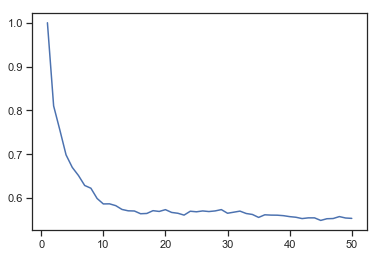

In [36]:
plt.plot(range(1, 51), clf_gs.cv_results_['mean_train_score'])

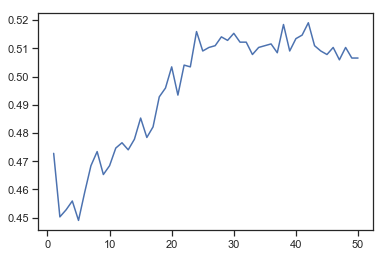

In [37]:
plt.plot(range(1, 51), clf_gs.cv_results_['mean_test_score'])


Значение Accuracy выросло, оптимальный K = 42.

Повторим для выборок X и y.

In [38]:
clf_gs.best_estimator_.fit(xTrain, yTrain.values.ravel())

yPredictedTrainNew = clf_gs.best_estimator_.predict(xTrain)
yPredictedTestNew = clf_gs.best_estimator_.predict(xTest)

print('Accuracy (train): {} %'.format(accuracy_score(yTrain, yPredictedTrain) * 100))
print('Accuracy (test): {} %'.format(accuracy_score(yTest, yPredictedTest) * 100))

print('New accuracy (train): {} %'.format(accuracy_score(yTrain, yPredictedTrainNew) * 100))
print('New accuracy (test): {} %'.format(accuracy_score(yTest, yPredictedTestNew) * 100))

Accuracy (train): 74.12040656763097 %
Accuracy (test): 45.3125 %
New accuracy (train): 55.27756059421422 %
New accuracy (test): 51.87500000000001 %


### Кривые обучения и валидации

In [39]:
from sklearn.model_selection import learning_curve, validation_curve

In [40]:
def plot_learning_curve(estimator, title, X, y, ylim=None, cv=None,
                        n_jobs=-1, train_sizes=np.linspace(.1, 1.0, 5)):
    """
    Generate a simple plot of the test and training learning curve.

    Parameters
    ----------
    estimator : object type that implements the "fit" and "predict" methods
        An object of that type which is cloned for each validation.

    title : string
        Title for the chart.

    X : array-like, shape (n_samples, n_features)
        Training vector, where n_samples is the number of samples and
        n_features is the number of features.

    y : array-like, shape (n_samples) or (n_samples, n_features), optional
        Target relative to X for classification or regression;
        None for unsupervised learning.

    ylim : tuple, shape (ymin, ymax), optional
        Defines minimum and maximum yvalues plotted.

    cv : int, cross-validation generator or an iterable, optional
        Determines the cross-validation splitting strategy.
        Possible inputs for cv are:
          - None, to use the default 3-fold cross-validation,
          - integer, to specify the number of folds.
          - :term:`CV splitter`,
          - An iterable yielding (train, test) splits as arrays of indices.

        For integer/None inputs, if ``y`` is binary or multiclass,
        :class:`StratifiedKFold` used. If the estimator is not a classifier
        or if ``y`` is neither binary nor multiclass, :class:`KFold` is used.

        Refer :ref:`User Guide <cross_validation>` for the various
        cross-validators that can be used here.

    n_jobs : int or None, optional (default=None)
        Number of jobs to run in parallel.
        ``None`` means 1 unless in a :obj:`joblib.parallel_backend` context.
        ``-1`` means using all processors. See :term:`Glossary <n_jobs>`
        for more details.

    train_sizes : array-like, shape (n_ticks,), dtype float or int
        Relative or absolute numbers of training examples that will be used to
        generate the learning curve. If the dtype is float, it is regarded as a
        fraction of the maximum size of the training set (that is determined
        by the selected validation method), i.e. it has to be within (0, 1].
        Otherwise it is interpreted as absolute sizes of the training sets.
        Note that for classification the number of samples usually have to
        be big enough to contain at least one sample from each class.
        (default: np.linspace(0.1, 1.0, 5))
    """
    plt.figure()
    plt.title(title)
    if ylim is not None:
        plt.ylim(*ylim)
    plt.xlabel("Training examples")
    plt.ylabel("Score")
    train_sizes, train_scores, test_scores = learning_curve(
        estimator, X, y, cv=cv, n_jobs=n_jobs, train_sizes=train_sizes)
    train_scores_mean = np.mean(train_scores, axis=1)
    train_scores_std = np.std(train_scores, axis=1)
    test_scores_mean = np.mean(test_scores, axis=1)
    test_scores_std = np.std(test_scores, axis=1)
    plt.grid()

    plt.fill_between(train_sizes, train_scores_mean - train_scores_std,
                     train_scores_mean + train_scores_std, alpha=0.1,
                     color="r")
    plt.fill_between(train_sizes, test_scores_mean - test_scores_std,
                     test_scores_mean + test_scores_std, alpha=0.1, color="g")
    plt.plot(train_sizes, train_scores_mean, 'o-', color="r",
             label="Training score")
    plt.plot(train_sizes, test_scores_mean, 'o-', color="g",
             label="Cross-validation score")

    plt.legend(loc="best")
    return plt

<module 'matplotlib.pyplot' from '/Users/artyom.andreev/Study/.venv/lib/python3.7/site-packages/matplotlib/pyplot.py'>

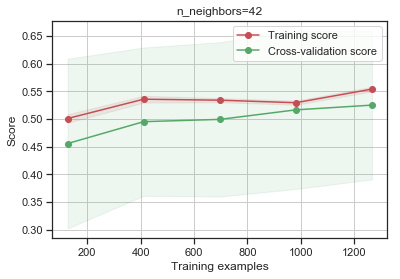

In [41]:
plot_learning_curve(clf_gs.best_estimator_, 'n_neighbors=42',
                    xTrain, yTrain.values.ravel(), cv=KFold(n_splits=100))

In [42]:
def plot_validation_curve(estimator, title, X, y, 
                          param_name, param_range, cv, 
                          scoring="accuracy"):
                                                   
    train_scores, test_scores = validation_curve(
        estimator, X, y, param_name=param_name, param_range=param_range,
        cv=cv, scoring=scoring,
        n_jobs=-1
    )
    train_scores_mean = np.mean(train_scores, axis=1)
    train_scores_std = np.std(train_scores, axis=1)
    test_scores_mean = np.mean(test_scores, axis=1)
    test_scores_std = np.std(test_scores, axis=1)

    plt.title(title)
    plt.xlabel(param_name)
    plt.ylabel("Score")
    plt.ylim(0.0, 1.1)
    lw = 2
    plt.plot(param_range, train_scores_mean, label="Training score",
                 color="darkorange", lw=lw)
    plt.fill_between(param_range, train_scores_mean - train_scores_std,
                     train_scores_mean + train_scores_std, alpha=0.2,
                     color="darkorange", lw=lw)
    plt.plot(param_range, test_scores_mean, label="Cross-validation score",
                 color="navy", lw=lw)
    plt.fill_between(param_range, test_scores_mean - test_scores_std,
                     test_scores_mean + test_scores_std, alpha=0.2,
                     color="navy", lw=lw)
    plt.legend(loc="best")
    return plt

<module 'matplotlib.pyplot' from '/Users/artyom.andreev/Study/.venv/lib/python3.7/site-packages/matplotlib/pyplot.py'>

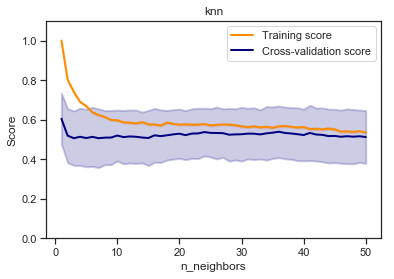

In [43]:
plot_validation_curve(KNeighborsClassifier(), 'knn', 
                      xTrain, yTrain.values.ravel(), 
                      param_name='n_neighbors', param_range=range(1, 51), 
                      cv=KFold(n_splits=100), scoring="accuracy")